##First we need to import libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving haberman.csv to haberman.csv


##1.Now load the Haberman Dataset 

In [3]:
import io 
haber = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))
print(haber)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


##To find points and features in our Dataset

In [4]:
print(haber.shape)

(306, 4)


####Observation: There 306 rows and 4 columns

## To find the column names in our dataset

In [5]:
haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

#### Observation: The column names are age, year, nodes,status

##To find the Data-points per class

In [6]:
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

## 2.Performing univariate analysis 

##PDF

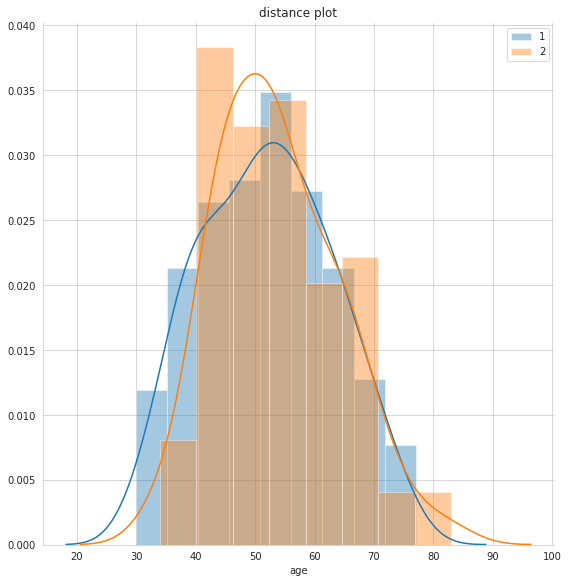

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue= "status",size=8)\
.map(sns.distplot, "age")
plt.legend()
plt.title("distance plot")
plt.show()


####Observation: Here, we find that at the age of 30-73 the survival and death is same.

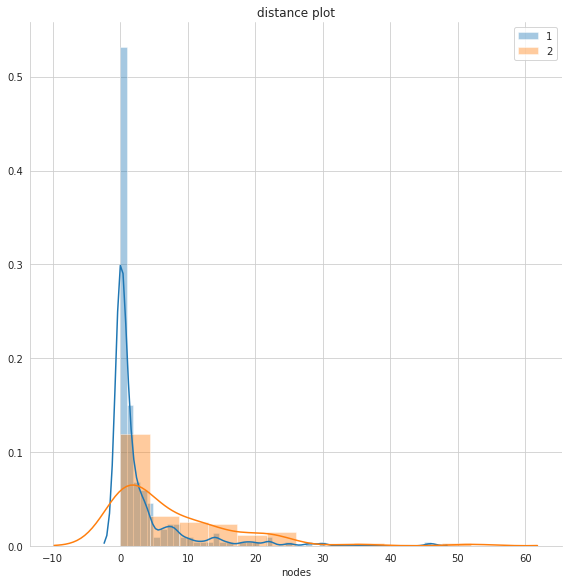

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(haber,hue='status',size=8)\
.map(sns.distplot,'nodes')
plt.legend()
plt.title("distance plot")
plt.show()

####Observation:People survive long if they have less nodes detected and vice versa.

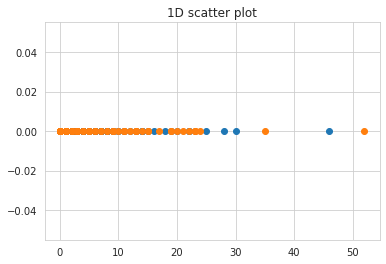

In [11]:
long_live = haber.loc[haber['status']==1]
short_live= haber.loc[haber['status']==2]
plt.plot(long_live['nodes'],np.zeros_like(long_live['nodes']), 'o')
plt.plot(short_live['nodes'],np.zeros_like(short_live['nodes']), 'o')
plt.title('1D scatter plot')
plt.show()

####Observation: 1_D scatter plot

##CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


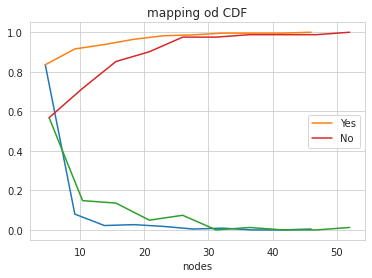

In [12]:
counts,bin_edges = np.histogram(long_live['nodes'],bins = 10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf, label = 'Yes') 
plt.xlabel('nodes')
#Long live
counts,bin_edges = np.histogram(short_live['nodes'],bins = 10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf, label = 'No')
plt.xlabel('nodes')
#Short_live
plt.title('mapping od CDF')
plt.legend()
plt.show()

####Observation:long_live and Short_live status is shown above in orange and red lines

##Box-Plot

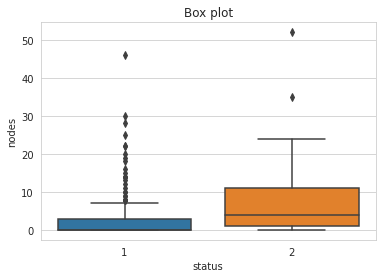

In [13]:
sns.boxplot(x='status',y='nodes',data=haber)
plt.title('Box plot')
plt.show()

####Observation: Here, we observe that the 25th and 50th percentile of long survive are almost equal or same where as for short survive 50Th percentile nodes are nearly same as long survive 75th percentile

##Violin-plot

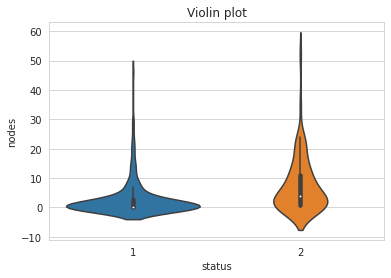

In [14]:
sns.violinplot(x= 'status',y='nodes',data=haber)
plt.title('Violin plot')
plt.show()

####Observation:In the status 1 , the long survival density of the is more near then 0node where as status 2 the short survival density is more at 0-15

##3.Bi-variate analysis

##2-D scatter plot

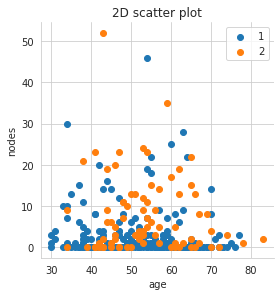

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") 
plt.legend()
plt.title('2D scatter plot')
plt.show()

####Observation: Here , I can observe the 2-D scatter plot with different colour polarity of age on x-axis and nodes on y-axis.

##Pair-plot

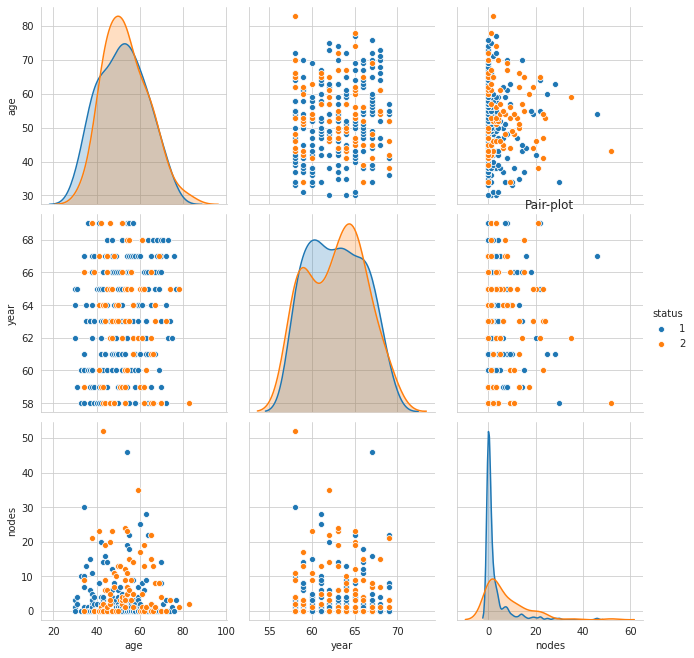

In [18]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,hue='status',size=3)
plt.title('Pair-plot')
plt.show()

####Observation: Here, i can observe 3x3 matrix from where we have age,year,nodes as features and by observing all the plots from 1-9, I decided that plot 3 and plot 7 can be considered for my all further data operations because the points are less overlapped when compared to other plots.